# Relevancy Analysis

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/relevancy](https://github.com/huseinzol05/Malaya/tree/master/example/relevancy).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
%%time
import malaya

CPU times: user 6.05 s, sys: 1.26 s, total: 7.31 s
Wall time: 9.12 s


### Models accuracy

We use `sklearn.metrics.classification_report` for accuracy reporting, check at https://malaya.readthedocs.io/en/latest/models-accuracy.html#relevancy-analysis

### labels supported

Default labels for relevancy module.

In [2]:
malaya.relevancy.label

['not relevant', 'relevant']

### Explanation

Positive relevancy: The article or piece of text is relevant, tendency is high to become not a fake news. Can be a positive or negative sentiment.

Negative relevancy: The article or piece of text is not relevant, tendency is high to become a fake news. Can be a positive or negative sentiment.

**Right now relevancy module only support deep learning model**.

In [2]:
negative_text = 'Roti Massimo Mengandungi DNA Babi. Roti produk Massimo keluaran Syarikat The Italian Baker mengandungi DNA babi. Para pengguna dinasihatkan supaya tidak memakan produk massimo. Terdapat pelbagai produk roti keluaran syarikat lain yang boleh dimakan dan halal. Mari kita sebarkan berita ini supaya semua rakyat Malaysia sedar dengan apa yang mereka makna setiap hari. Roti tidak halal ada DNA babi jangan makan ok.'
positive_text = 'Jabatan Kemajuan Islam Malaysia memperjelaskan dakwaan sebuah mesej yang dikitar semula, yang mendakwa kononnya kod E dikaitkan dengan kandungan lemak babi sepertimana yang tular di media sosial. . Tular: November 2017 . Tular: Mei 2014 JAKIM ingin memaklumkan kepada masyarakat berhubung maklumat yang telah disebarkan secara meluas khasnya melalui media sosial berhubung kod E yang dikaitkan mempunyai lemak babi. Untuk makluman, KOD E ialah kod untuk bahan tambah (aditif) dan ianya selalu digunakan pada label makanan di negara Kesatuan Eropah. Menurut JAKIM, tidak semua nombor E yang digunakan untuk membuat sesuatu produk makanan berasaskan dari sumber yang haram. Sehubungan itu, sekiranya sesuatu produk merupakan produk tempatan dan mendapat sijil Pengesahan Halal Malaysia, maka ia boleh digunakan tanpa was-was sekalipun mempunyai kod E-kod. Tetapi sekiranya produk tersebut bukan produk tempatan serta tidak mendapat sijil pengesahan halal Malaysia walaupun menggunakan e-kod yang sama, pengguna dinasihatkan agar berhati-hati dalam memilih produk tersebut.'

### List available Transformer models

In [2]:
malaya.relevancy.available_transformer()

INFO:root:tested on 20% test set.


,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score,max length
bert,425.6,111.00,0.89320,0.89195,0.89256,512.0
tiny-bert,57.4,15.40,0.87179,0.86324,0.86695,512.0
albert,48.6,12.80,0.89798,0.86008,0.87209,512.0
tiny-albert,22.4,5.98,0.82157,0.83410,0.82416,512.0
xlnet,446.6,118.00,0.92707,0.92103,0.92381,512.0
alxlnet,46.8,13.30,0.91135,0.90446,0.90758,512.0
bigbird,458.0,116.00,0.88093,0.86832,0.87352,1024.0
tiny-bigbird,65.0,16.90,0.86558,0.85871,0.86176,1024.0
fastformer,458.0,116.00,0.92387,0.91064,0.91616,2048.0
tiny-fastformer,77.3,19.70,0.85655,0.86337,0.85925,2048.0


### Load Transformer model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer relevancy model.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
        * ``'alxlnet'`` - Malaya ALXLNET BASE parameters.
        * ``'bigbird'`` - Google BigBird BASE parameters.
        * ``'tiny-bigbird'`` - Malaya BigBird BASE parameters.
        * ``'fastformer'`` - FastFormer BASE parameters.
        * ``'tiny-fastformer'`` - FastFormer TINY parameters.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        List of model classes:

        * if `bert` in model, will return `malaya.model.bert.MulticlassBERT`.
        * if `xlnet` in model, will return `malaya.model.xlnet.MulticlassXLNET`.
        * if `bigbird` in model, will return `malaya.model.xlnet.MulticlassBigBird`.
        * if `fastformer` in model, will return `malaya.model.fastformer.MulticlassFastFormer`.
    """
```

In [4]:
model = malaya.relevancy.transformer(model = 'tiny-bigbird')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [5]:
quantized_model = malaya.relevancy.transformer(model = 'alxlnet', quantized = True)

#### Predict batch of strings

```python
def predict(self, strings: List[str]):
    """
    classify list of strings.

    Parameters
    ----------
    strings: List[str]

    Returns
    -------
    result: List[str]
    """
```

In [7]:
%%time

model.predict([negative_text, positive_text])

CPU times: user 2.04 s, sys: 520 ms, total: 2.56 s
Wall time: 1.23 s


['not relevant', 'relevant']

In [8]:
%%time

quantized_model.predict([negative_text, positive_text])

CPU times: user 5.08 s, sys: 823 ms, total: 5.91 s
Wall time: 2.96 s


['not relevant', 'relevant']

#### Predict batch of strings with probability

```python
def predict_proba(self, strings: List[str]):
    """
    classify list of strings and return probability.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[dict[str, float]]
    """
```

In [9]:
%%time

model.predict_proba([negative_text, positive_text])

CPU times: user 1.46 s, sys: 403 ms, total: 1.86 s
Wall time: 319 ms


[{'not relevant': 0.9896912, 'relevant': 0.010308762},
 {'not relevant': 0.007830339, 'relevant': 0.9921697}]

In [10]:
%%time

quantized_model.predict_proba([negative_text, positive_text])

CPU times: user 2.98 s, sys: 386 ms, total: 3.37 s
Wall time: 583 ms


[{'not relevant': 0.9999988, 'relevant': 1.2511766e-06},
 {'not relevant': 9.157779e-06, 'relevant': 0.9999908}]

#### Open relevancy visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

```python
def predict_words(
    self,
    string: str,
    method: str = 'last',
    bins_size: float = 0.05,
    visualization: bool = True,
):
    """
    classify words.

    Parameters
    ----------
    string : str
    method : str, optional (default='last')
        Attention layer supported. Allowed values:

        * ``'last'`` - attention from last layer.
        * ``'first'`` - attention from first layer.
        * ``'mean'`` - average attentions from all layers.
    bins_size: float, optional (default=0.05)
        default bins size for word distribution histogram.
    visualization: bool, optional (default=True)
        If True, it will open the visualization dashboard.

    Returns
    -------
    dictionary: results
    """
```

**This method not available for BigBird models**.

In [11]:
model.predict_words(negative_text)

NotImplementedError: 

In [9]:
quantized_model.predict_words(negative_text)

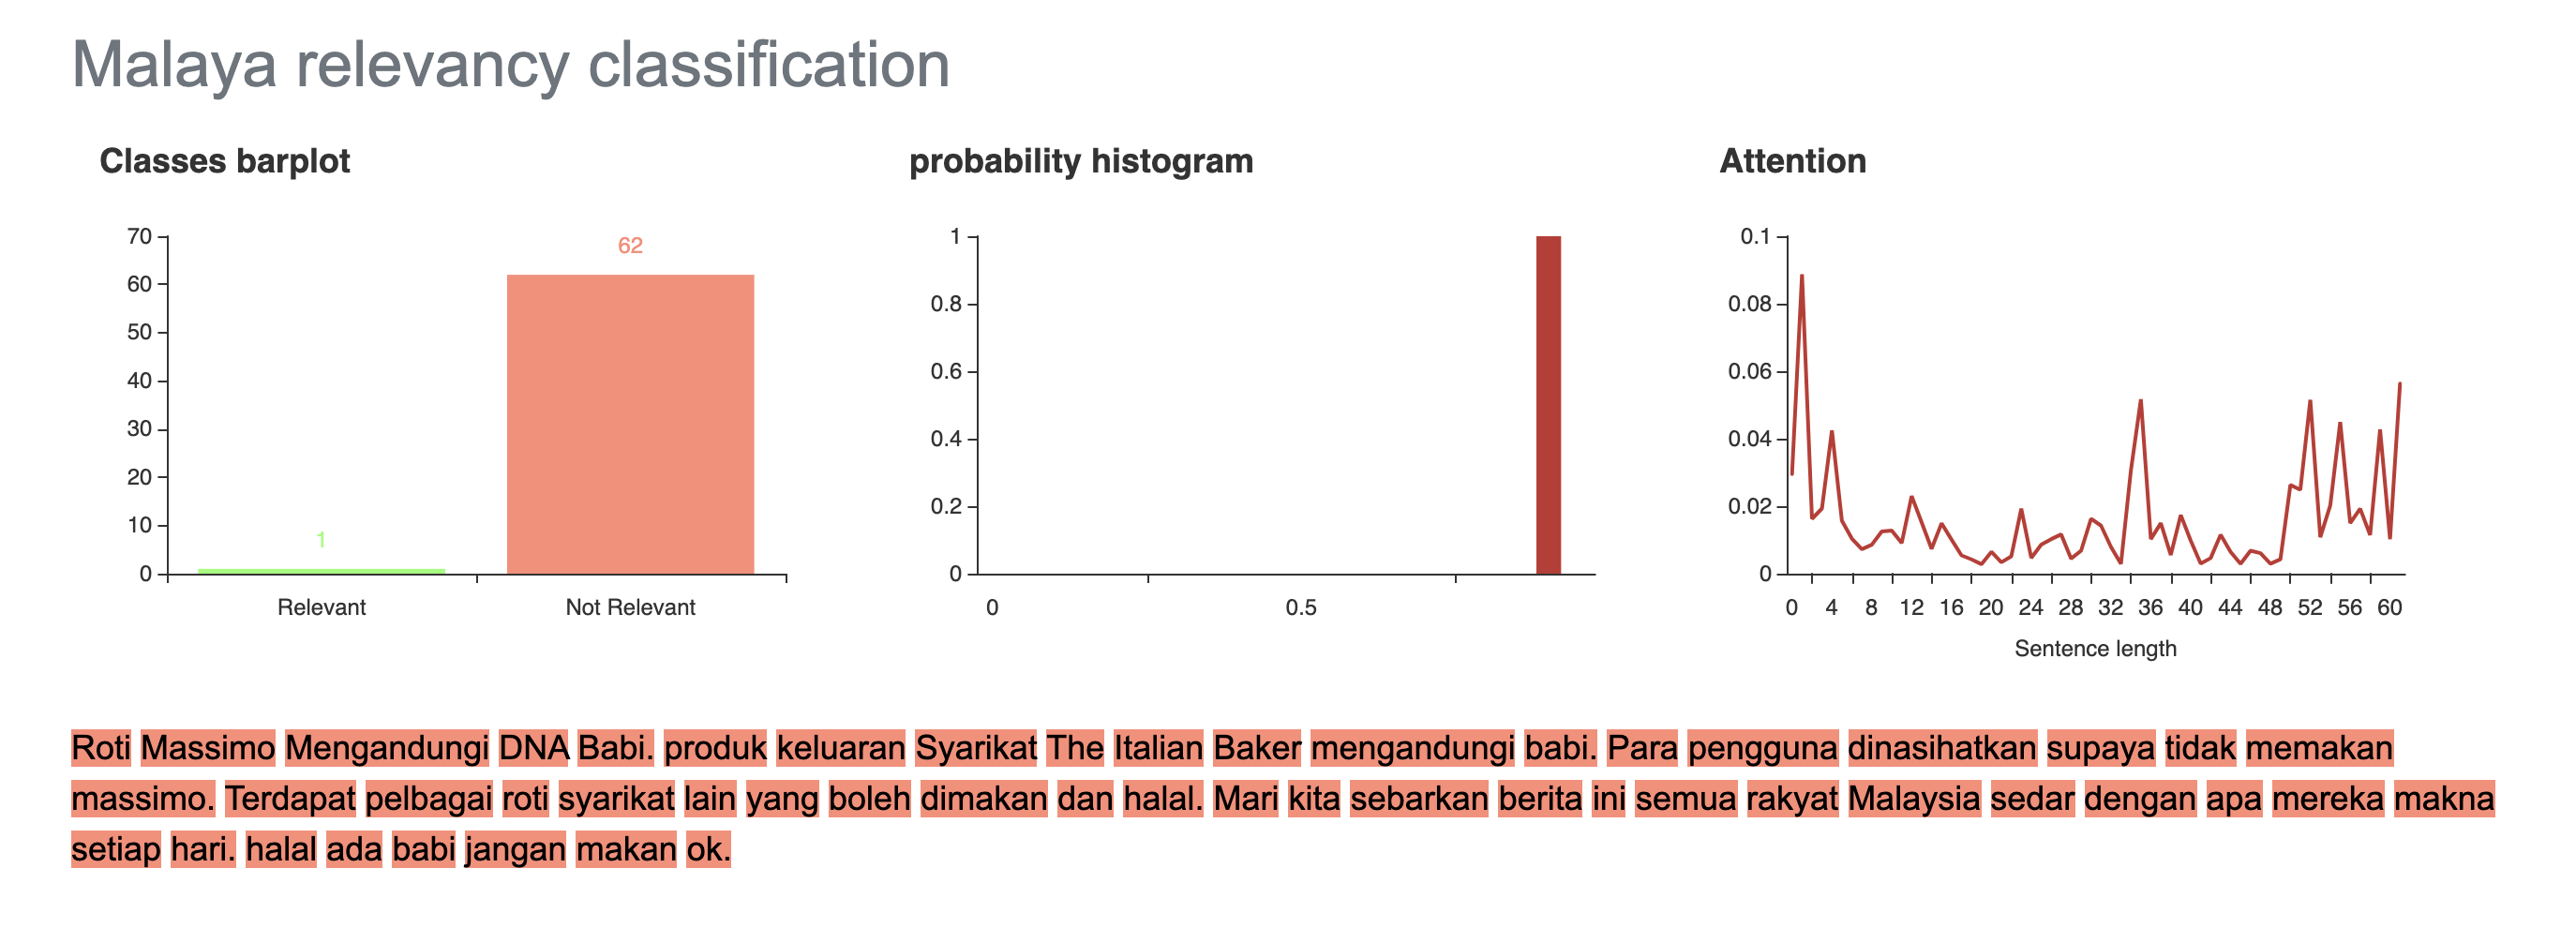

In [10]:
from IPython.core.display import Image, display

display(Image('relevancy-dashboard.png', width=800))

### Vectorize

Let say you want to visualize sentence / word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, strings: List[str], method: str = 'first'):
    """
    vectorize list of strings.

    Parameters
    ----------
    strings: List[str]
    method : str, optional (default='first')
        Vectorization layer supported. Allowed values:

        * ``'last'`` - vector from last sequence.
        * ``'first'`` - vector from first sequence.
        * ``'mean'`` - average vectors from all sequences.
        * ``'word'`` - average vectors based on tokens.

    Returns
    -------
    result: np.array
    """
```

#### Sentence level

In [10]:
texts = [negative_text, positive_text]
r = model.vectorize(texts, method = 'first')

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(r)
tsne.shape

(2, 2)

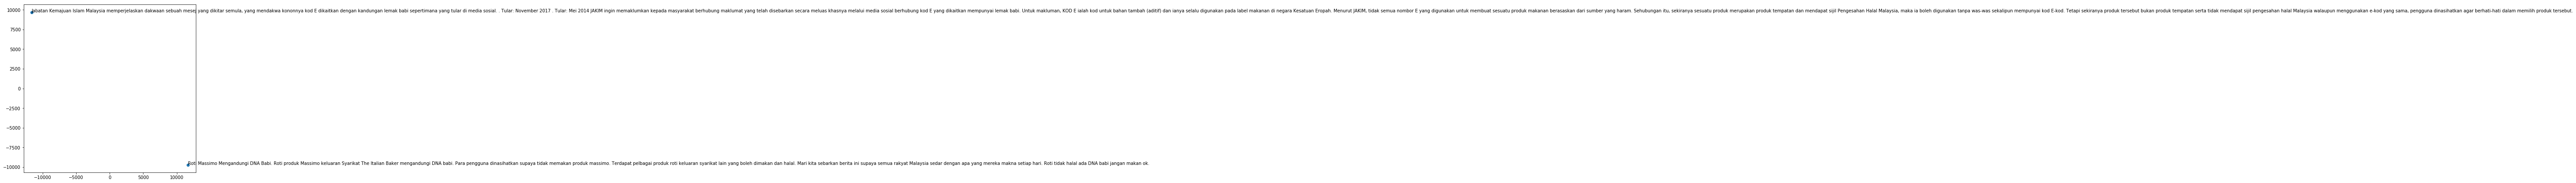

In [12]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = texts
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

#### Word level

In [13]:
r = quantized_model.vectorize(texts, method = 'word')

In [14]:
x, y = [], []
for row in r:
    x.extend([i[0] for i in row])
    y.extend([i[1] for i in row])

In [15]:
tsne = TSNE().fit_transform(y)
tsne.shape

(211, 2)

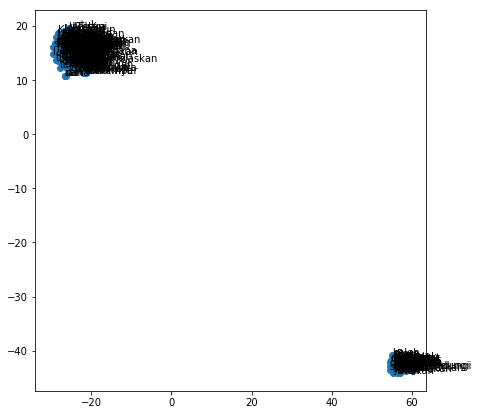

In [16]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )

Pretty good, the model able to know cluster bottom left as positive relevancy.

### Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [ ]:
albert = malaya.relevancy.transformer(model = 'albert')

INFO:tensorflow:loading sentence piece model


In [14]:
malaya.stack.predict_stack([albert, model], [positive_text, negative_text])

[{'not relevant': 3.1056952e-06, 'relevant': 0.9999934},
 {'not relevant': 0.99982065, 'relevant': 3.868528e-05}]